# K Means Clustering Algorithm

## Dataset

This synthetic dataset has been specifically designed for demonstrating the K-means clustering algorithm. It comprises 300 data points distributed across three distinct clusters. Each cluster is generated using a normal distribution centered around predefined means with specific standard deviations, making the clusters well-separated and easy to distinguish visually.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Set the random seed for reproducibility
np.random.seed(42)

def generate_dataset():
    """
    Generates a synthetic dataset with three clusters.

    Returns:
        dataset (ndarray): An array of shape (300, 2), containing 300 data points with 2 features each.
    """
    # Number of data points in each cluster
    points_per_cluster = 100

    # Mean coordinates for each cluster
    cluster_centers = np.array([[1, 2], [4, 2], [2, 4]])

    # Standard deviations for each cluster
    cluster_stds = np.array([[0.4, 0.3], [0.3, 0.4], [0.4, 0.4]])

    # Generate data points for each cluster
    dataset = []
    for center, std in zip(cluster_centers, cluster_stds):
        dataset.append(np.random.normal(loc=center, scale=std, size=(points_per_cluster, 2)))

    # Concatenate all data points into a single array
    dataset = np.vstack(dataset)
    return dataset

dataset = generate_dataset()

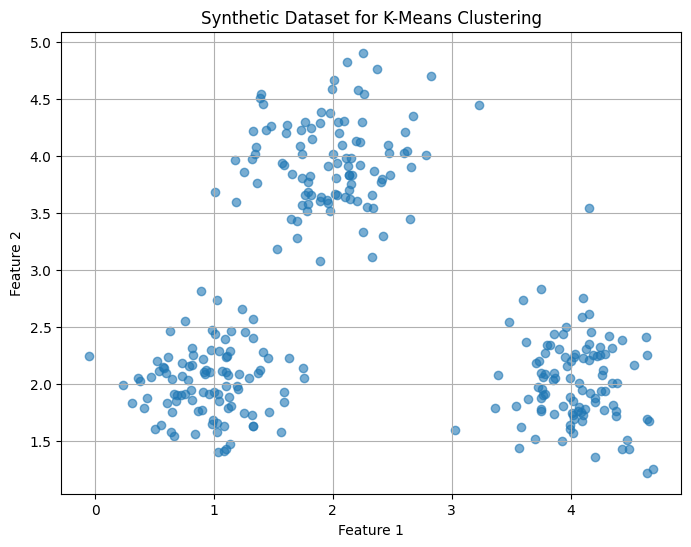

In [ ]:
# Plot the generated synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.6)
plt.title('Synthetic Dataset for K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [ ]:
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.19868566 1.95852071]
 [1.25907542 2.45690896]
 [0.90633865 1.92975891]
 [1.63168513 2.23023042]
 [0.81221025 2.16276801]]
The shape of X is: (300, 2)


# Random Initialisation

In [ ]:
def select_initial_centroids(data, K):
    """
    Randomly initializes centroids from the dataset.

    Parameters:
        data (ndarray): Data points of shape (m, n)
        K (int): Number of centroids/clusters

    Returns:
        initial_centroids (ndarray): An array of shape (K, n), initialized centroids.
    """
    # Randomly permute the indices of examples
    random_indices = np.random.permutation(data.shape[0])

    # Select the first K examples as centroids
    initial_centroids = data[random_indices[:K]]

    return initial_centroids

## Finding Closest Centroids

In [ ]:
def assign_clusters(data, centroids):
    """
    Assigns each data point to the nearest centroid.

    Parameters:
        data (ndarray): Data points of shape (m, n)
        centroids (ndarray): Current centroids of shape (K, n)

    Returns:
        indices (ndarray): An array of shape (m,), containing the index of the nearest centroid for each data point.
    """

    # Compute all distances from each point to each centroid:
    # - data[:, np.newaxis] reshapes the data to (m, 1, n) to allow broadcasting
    # - Subtracting centroids reshaped as (1, K, n) (implicitly) from data
    # - np.linalg.norm(..., axis=2) calculates the Euclidean distance along the last axis (n),
    #   resulting in a matrix of shape (m, K) where each element (i, j) is the distance from
    #   the i-th data point to the j-th centroid.
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

    # Determine the closest centroid for each data point:
    # - np.argmin(distances, axis=1) finds the indices of the minimum values along axis 1 (centroids),
    #   which corresponds to the nearest centroid for each data point.
    # - The result indices is an array of shape (m,), where each element is the index of the
    #   nearest centroid to the corresponding data point.
    indices = np.argmin(distances, axis=1)

    return indices

## Updating Centroids

In [ ]:
def update_centroids(data, indices, K):
    """
    Recomputes the centroids by averaging the data points assigned to each centroid.

    Parameters:
        data (ndarray): Data points of shape (m, n)
        indices (ndarray): Indices of the closest centroids of shape (m,)
        K (int): Number of centroids

    Returns:
        new_centroids (ndarray): An array of shape (K, n), the new centroids computed.
    """
    new_centroids = np.zeros((K, data.shape[1]))
    for i in range(K):
        # Calculate the mean for points assigned to the centroid
        new_centroids[i] = data[indices == i].mean(axis=0)
    return new_centroids

## K - Means

In [ ]:
def k_means(data, K=3, iterations=10):
    """
    Performs K-means clustering on dataset.

    Parameters:
        data (ndarray): Dataset of shape (m, n) where each row is a data example
        K (int): Number of clusters
        iterations (int): Number of iterations to run the K-means algorithm

    Returns:
        final_centroids (ndarray): An array of shape (K, n), the centroids found by K-means
        cluster_indices (ndarray): An array of shape (m,), indices of the closest centroids for each data point
    """
    centroids = select_initial_centroids(data, K)

    for _ in range(iterations):
        cluster_indices = assign_clusters(data, centroids)
        centroids = update_centroids(data, cluster_indices, K)

    return centroids, cluster_indices

In [ ]:
final_centroids, cluster_indices = k_means(dataset)
print("Final Centroids:\n", final_centroids)

Final Centroids:
 [[1.98198505 3.94949093]
 [0.9537743  2.0102067 ]
 [4.03847462 2.01739506]]


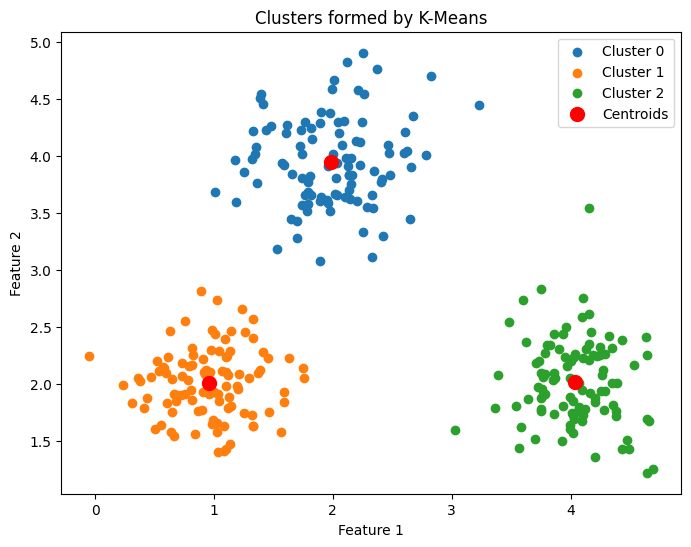

In [ ]:
# Plot the clusters after K-means
plt.figure(figsize=(8, 6))
for k in range(final_centroids.shape[0]):
    # Gather points assigned to each cluster
    cluster_data = dataset[cluster_indices == k]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {k}')
# Mark centroids on the plot
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', s=100, label='Centroids')
plt.title('Clusters formed by K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()